In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
import numpy as np


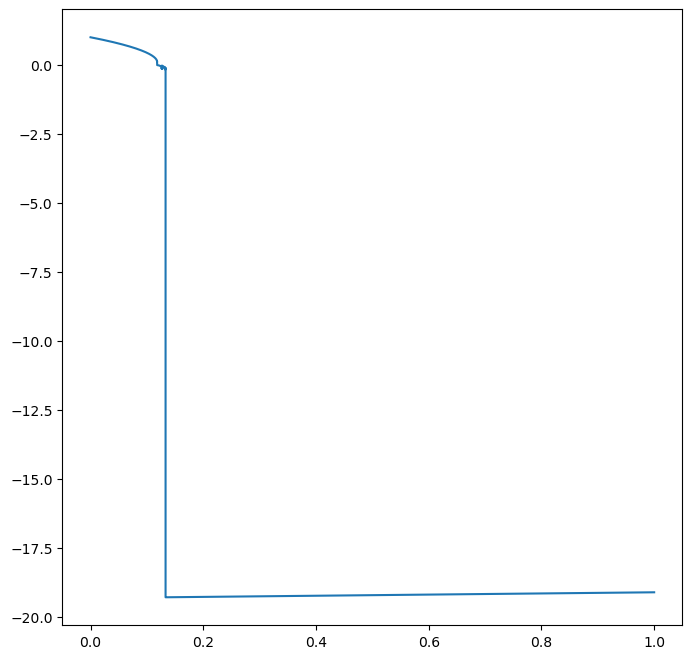

In [10]:
t = 0
h_x = 1

t_step = 0.000001

hs = []
ts = []

for i in range(1000000):
    hs.append(h_x)
    ts.append(t)
    t+= t_step
    h_x = h_x + t_step*((-2/(h_x-t))+(-2/(h_x+t)))
    
plt.figure(figsize=(8, 8))
plt.plot(ts,hs)
plt.show()

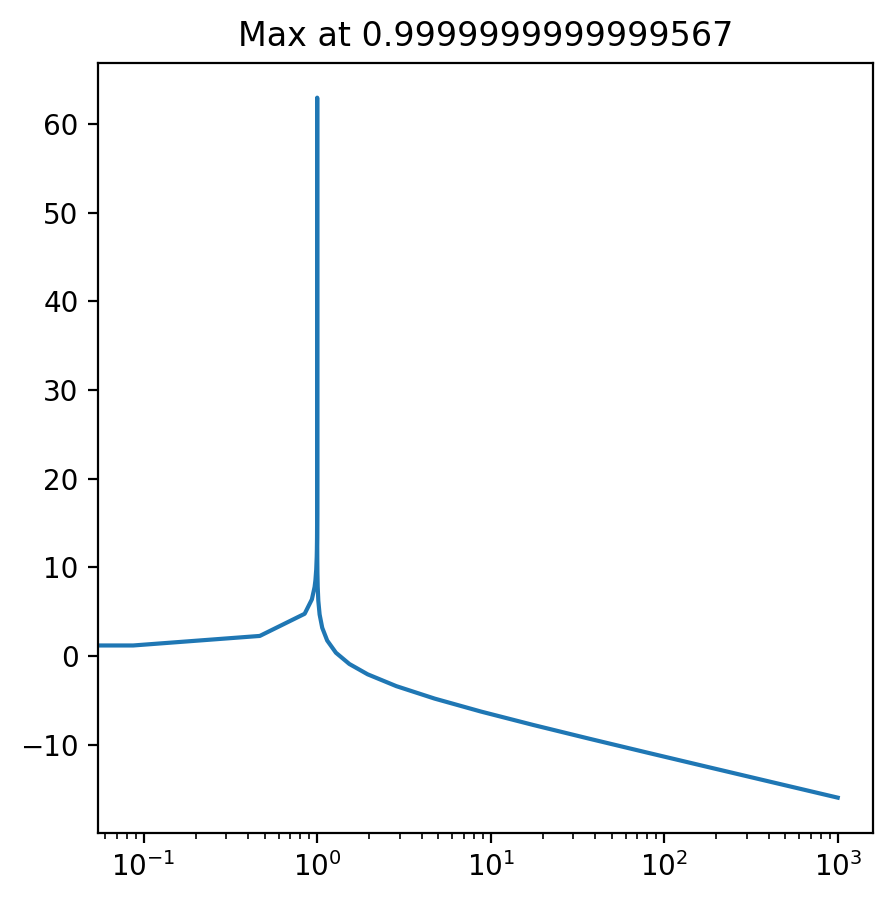

In [2]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

# Need to define a function for the ODE
def f(y,t):
    
    C = 1
    
    dydt = -2 / (y - C)
    
    return [dydt]

# What is the time span you want to look at
t_span = [0,1000]

# Initial condition
y0 = [1]

# Run the solution function and pull out the solutions
# This uses an inherent adaptive tiemstep. I trust it for this stuff, but it has been wacky for me before. 
sol = solve_ivp(f, t_span, y0, method='RK45')
y = sol.y[0]
t = sol.t


# Plot
plt.figure(figsize=(5,5), dpi=200)
plt.title(f'Max at {t[np.argmax(y)]}')
plt.plot(t,y)
plt.xscale('log')
plt.show()

(200, 200) (200, 200) (200, 200)


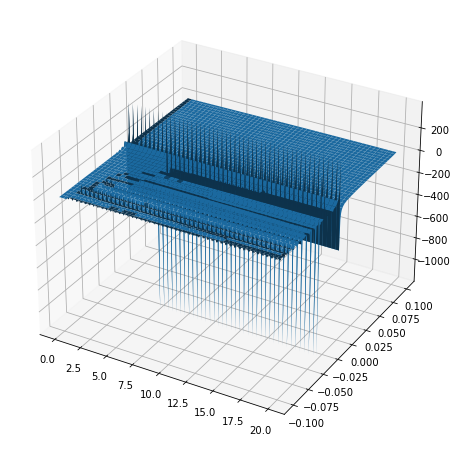

In [6]:
a_x = -0.1
b_x = 0.1
a_t = 0
b_t = 20
n_x = 200
n_t = 200

t_step = (b_t-a_t)/n_t

ts = np.linspace(a_t,b_t, n_t)
xs = np.linspace(a_x,b_x, n_x)

hs_at_t = np.linspace(a_x,b_x, n_x)

hs = []
for t in ts:
    hs.append(hs_at_t)
    dh_dt = -2/(hs_at_t-t)
    hs_at_t = hs_at_t+ (t_step*dh_dt)
    
    

H = np.array(hs).T
T,X = np.meshgrid(ts,xs)


print(np.shape(H),np.shape(T),np.shape(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
#plt.figure(figsize=(8, 8))

ax.plot_surface(T,X,H)